In [1]:
from typing import Union
from datetime import datetime, timedelta
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import cv2
from sklearn.cluster import DBSCAN
import math
from datetime import timedelta
from scipy.ndimage import convolve
from tqdm import tqdm

from dasly import dasly, helper

In [2]:
# folder_path = '/mnt/Datastore/usr/kptruong/Svalbard_whale/dphi_1220'
folder_path = '/mnt/Datastore/usr/kptruong/Svalbard_whale/20220822'
file_paths = helper.find_hdf5(folder_path)
# file_paths = file_paths[8:8+6]
# file_paths = file_paths[0:6]
file_paths = file_paths[49+3:49+6]
file_paths

['/mnt/Datastore/usr/kptruong/Svalbard_whale/20220822/dphi/122839.hdf5',
 '/mnt/Datastore/usr/kptruong/Svalbard_whale/20220822/dphi/122849.hdf5',
 '/mnt/Datastore/usr/kptruong/Svalbard_whale/20220822/dphi/122859.hdf5']

In [3]:
das = dasly.Dasly()
das.load_data(file_paths=file_paths)
print(das.signal.shape)

Welcome to Dasly!
(18750, 33748)


In [4]:
das.signal = das.signal.loc[:, 50000:97500]

Downsampling factor: 5
New sampling rate: 125
vmin: -1.11e-07, vmax: 1.11e-07


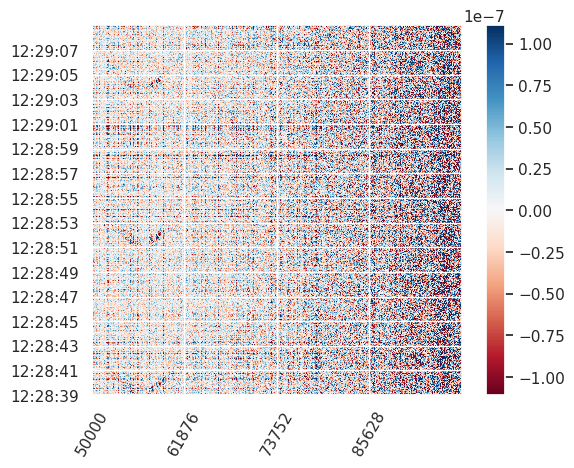

In [5]:
das.decimate(frequency=25)
das.heatmap()

vmin: -4.36e-08, vmax: 4.36e-08


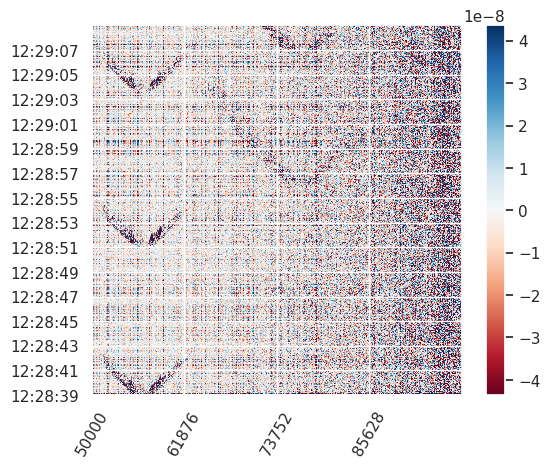

In [6]:
das.bandpass_filter(15, 25)
das.heatmap()

In [7]:
das.signal.shape

(3750, 11876)

vmax: 2.87e-08


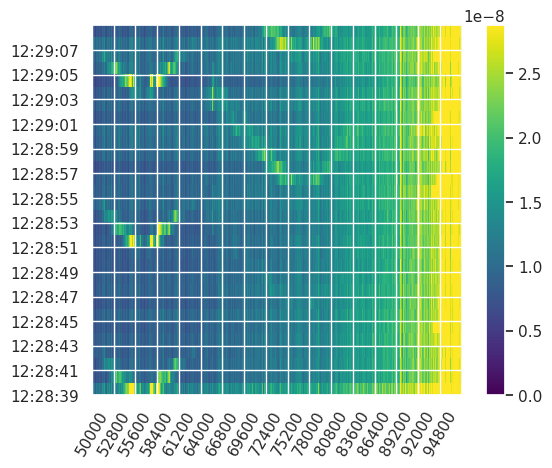

In [9]:
das.signal = das.signal.abs()
das.sample(seconds=1, channels=100, func_name='mean')
das.heatmap()

In [10]:
das.signal.shape

(30, 476)

vmax: 2.18e-08


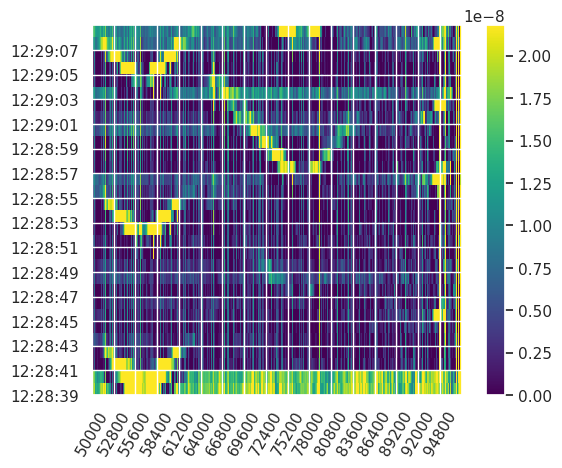

In [11]:
das.sobel_filter()
das.heatmap()

threshold: 1.604938820836673e-08


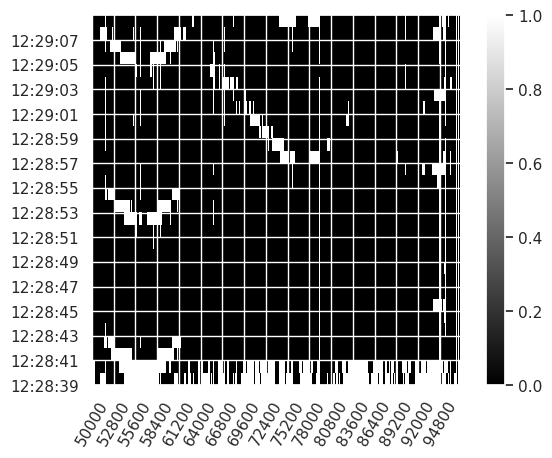

In [12]:
das.binary_filter()
das.heatmap()

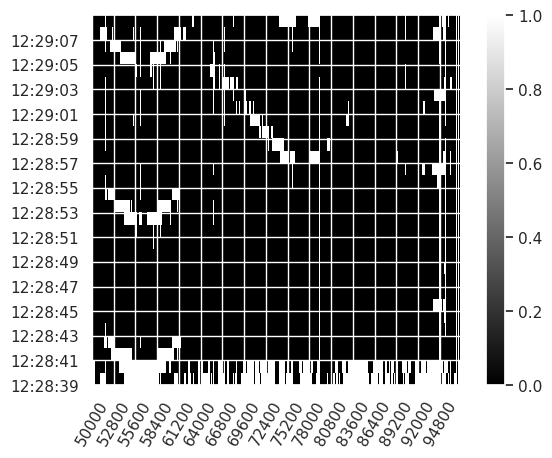

In [13]:
das.hough_transform()
das.heatmap()

In [34]:
das.sample(seconds=1, channels=100, func_name='max')

In [122]:
lines = cv2.HoughLinesP(
    das.signal.values,
    rho=1,  # distance resolution
    # angle resolution in radian need to have speed resolution ~0.1k/m
    theta= np.pi / (180*100),
    threshold=40,
    minLineLength=40,
    maxLineGap=55
)
print(len(lines))
lines = np.squeeze(lines, axis=1)

18


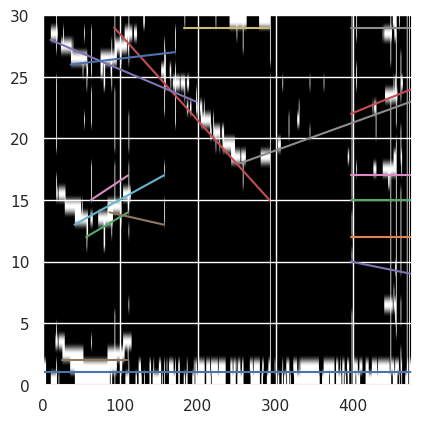

In [123]:
cmap = 'gray'
vmin = 0
vmax = 1


plt.imshow(
    X=das.signal.values,
    aspect=das.signal.shape[1] / das.signal.shape[0],  # square
    cmap=cmap,
    # norm=norm,
    # interpolation='none',  # no interpolation
    # to see the last values of x-axis
    extent=[0, das.signal.shape[1], 0, das.signal.shape[0]],
    origin='lower'
)

for line in lines:
    x1, y1, x2, y2 = line
    plt.plot([x1, x2], [y1, y2])

In [31]:
das.signal

,50000,50100,50200,50300,50400,50500,50600,50700,50800,50900,...,96600,96700,96800,96900,97000,97100,97200,97300,97400,97500
12:28:39,1,1,1,1,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
12:28:40,1,1,1,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
12:28:41,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12:28:42,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12:28:43,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12:28:44,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12:28:45,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12:28:46,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12:28:47,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12:28:48,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
